In [1]:

from datetime import datetime

########### Basic Parameters for Running: ################################

DateNow = datetime.today().strftime('%Y%m%d')
TimeNow = datetime.today().strftime('%H%M%S')
    
TFliteNamingAndVersion = "output/cnn32-md-" + DateNow + "-" + TimeNow     # Used for tflite Filename
#TFliteNamingAndVersion = "effnet"     # Used for tflite Filename
Load_Model = "output/cnn32-md_best.h5"  
ziffer_data_url="images"
output_dir="."
use_grayscale = False
nb_classes = 100
##########################################################################


In [2]:
from b2n.models.prune_quantize import prune, quantization_default
from b2n.data.ziffer import ziffer_data
from b2n.encodings.class_encoding import class_encoding
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from  tensorflow import keras

xz_data, yz_data, fz_data = ziffer_data(ziffer_data_url)
x_data, y_data = shuffle(xz_data, yz_data)
y_data = class_encoding(y_data, nb_classes)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

model = keras.models.load_model(Load_Model)

# prune the model
model_pruned = model
# pruning reduces the accurracy 
#model_pruned = prune(model=model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# quanitize and save the model
tflite_model = quantization_default(model=model_pruned, 
                            x_train=x_test)
# save the model
filename=TFliteNamingAndVersion + "-q.tflite"                                                     
open( filename, "wb").write(tflite_model)


Ziffer data count:  12462
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-06-21 00:26:28.636997: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-21 00:26:28.637317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-21 00:26:29.203835: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpsihkwgqb/assets


2022-06-21 00:26:34.108953: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-21 00:26:34.108967: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-21 00:26:34.109653: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpsihkwgqb
2022-06-21 00:26:34.111515: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-21 00:26:34.111523: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmpsihkwgqb
2022-06-21 00:26:34.118750: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-21 00:26:34.121391: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-21 00:26:34.175251: I tensorflow/cc/saved_model/loader.cc:212] Runn

INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmplgo5dgca/assets


INFO:tensorflow:Assets written to: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmplgo5dgca/assets
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-06-21 00:26:39.786488: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-21 00:26:39.786504: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-21 00:26:39.786579: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/07/sj9pw71n205_354358yc8scm0000gn/T/tmplgo5dgca
2022-06-21 00:26:39.788335: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-21 00:26:39.788341: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedMode

146784

Tested images: 12462. 86 false predicted. Accuracy is: 0.9930990210239127


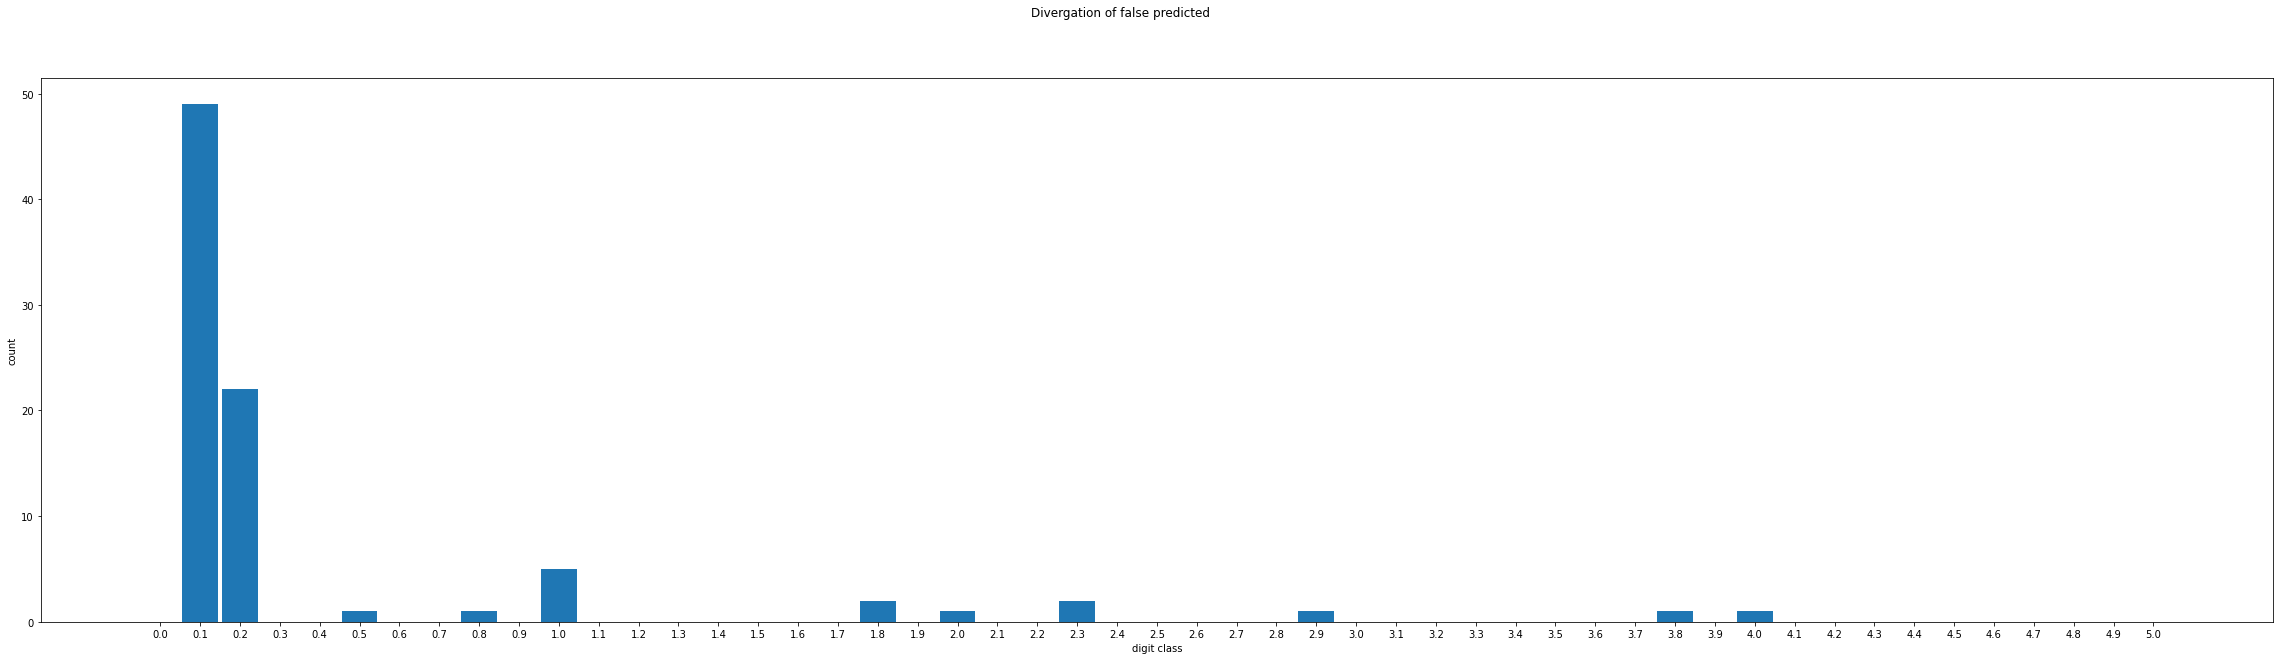

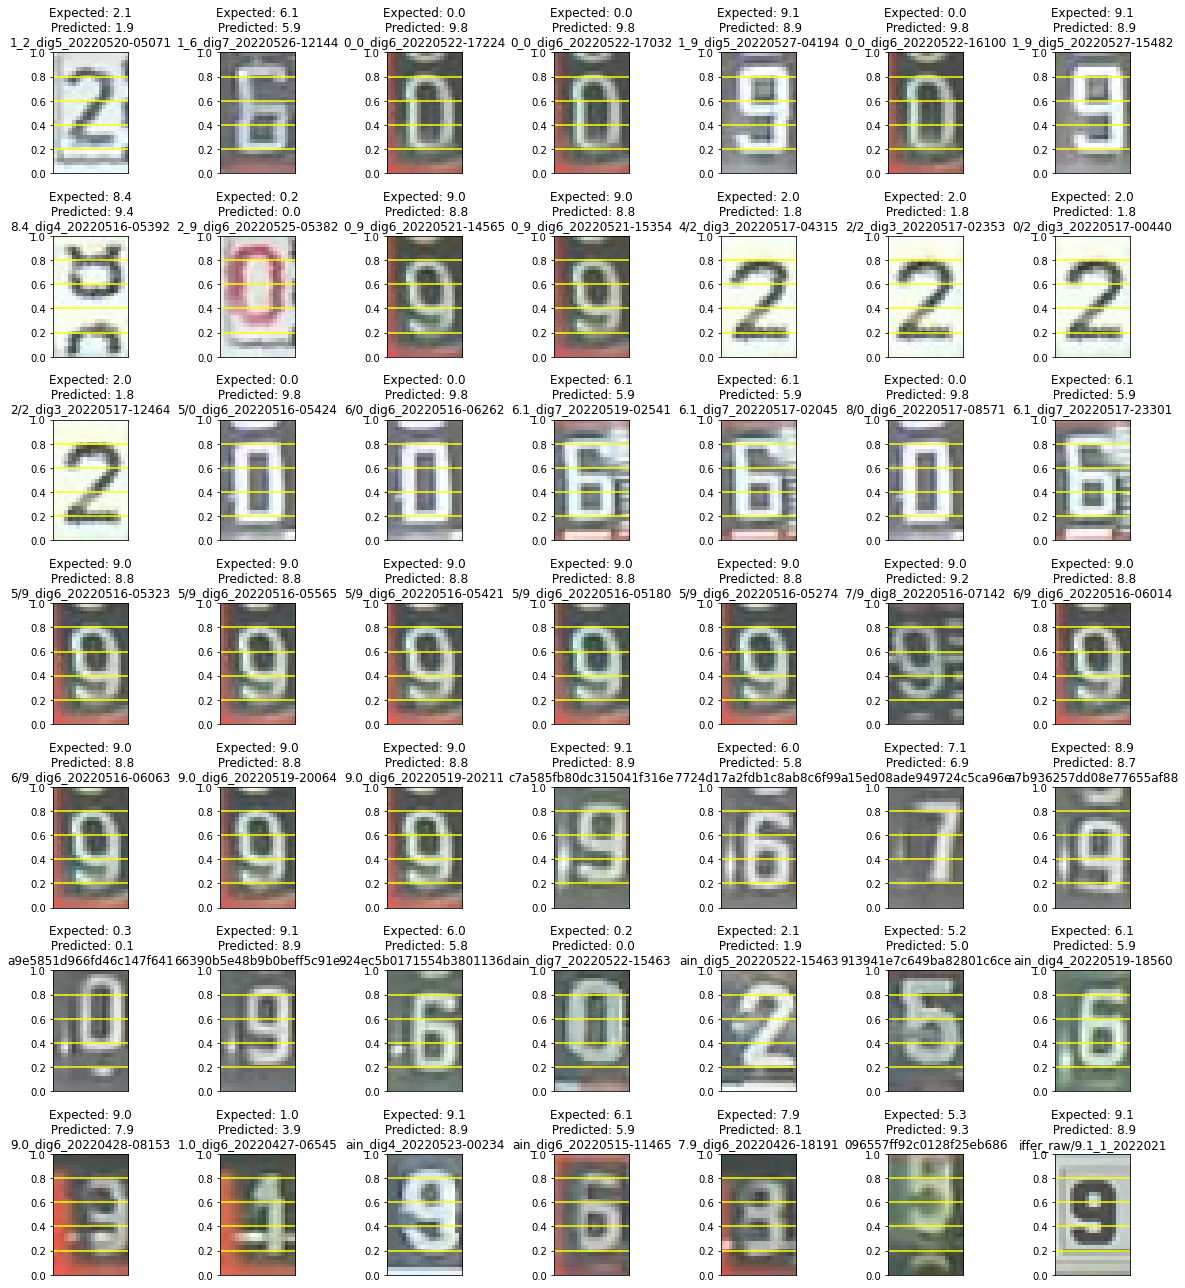

In [3]:
from b2n.plotfunctions import evaluate_ziffer_tflite
import numpy as np
evaluate_ziffer_tflite(filename, xz_data, yz_data, fz_data, "TF-Lite Results", max_delta = 0.11)
    